<a href="https://colab.research.google.com/github/MahimnaDarji/Self-Practice/blob/main/Best_Selling_Gameboy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/best-selling-gameboy.csv')

In [ ]:
data.head(5)

,Game,Developer(s),Publisher,Platform,Release date,Sales
0,Pokémon Red / Green / Blue / Yellow,Game Freak,Nintendo,Game Boy,1996-02-27,46020000
1,Tetris,Nintendo R&D1,Nintendo,Game Boy,1989-06-14,35000000
2,Pokémon Gold / Silver / Crystal,Game Freak,Nintendo,Game Boy Color,1999-11-21,29490000
3,Super Mario Land,Nintendo R&D1,Nintendo,Game Boy,1989-04-21,18140000
4,Super Mario Land 2: 6 Golden Coins,Nintendo R&D1,Nintendo,Game Boy,1992-10-21,11180000


In [ ]:
data.tail(5)

,Game,Developer(s),Publisher,Platform,Release date,Sales
61,Space Invaders,Taito,Nintendo,Game Boy,1994-01-01,1000000
62,The Smurfs,Bit Managers,Infogrames,Game Boy,1994-01-01,1000000
63,Street Fighter II,Sun L,Nintendo,Game Boy,1995-08-11,1000000
64,Game & Watch Gallery,Tose,Nintendo,Game Boy,1997-02-01,1000000
65,James Bond 007,Saffire,Nintendo,Game Boy,1998-01-29,1000000


In [ ]:
data.size

396

In [ ]:
data.shape

(66, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Game          66 non-null     object
 1   Developer(s)  66 non-null     object
 2   Publisher     66 non-null     object
 3   Platform      66 non-null     object
 4   Release date  66 non-null     object
 5   Sales         66 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 3.2+ KB


In [ ]:
data.describe

<bound method NDFrame.describe of                                    Game   Developer(s)   Publisher  \
0   Pokémon Red / Green / Blue / Yellow     Game Freak    Nintendo   
1                                Tetris  Nintendo R&D1    Nintendo   
2       Pokémon Gold / Silver / Crystal     Game Freak    Nintendo   
3                      Super Mario Land  Nintendo R&D1    Nintendo   
4    Super Mario Land 2: 6 Golden Coins  Nintendo R&D1    Nintendo   
..                                  ...            ...         ...   
61                       Space Invaders          Taito    Nintendo   
62                           The Smurfs   Bit Managers  Infogrames   
63                    Street Fighter II          Sun L    Nintendo   
64                 Game & Watch Gallery           Tose    Nintendo   
65                       James Bond 007        Saffire    Nintendo   

          Platform Release date     Sales  
0         Game Boy   1996-02-27  46020000  
1         Game Boy   1989-06-14  3500

In [ ]:
data.isnull().sum()

Game            0
Developer(s)    0
Publisher       0
Platform        0
Release date    0
Sales           0
dtype: int64

In [ ]:
data=data.drop(['Release date'],axis=1)

In [ ]:
data.size

330

In [ ]:
data.shape

(66, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbn=LabelEncoder()
X=data.iloc[:,0].values
data.iloc[:,0]=lbn.fit_transform(X)
X=X.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbn=LabelEncoder()
X=data.iloc[:,1].values
data.iloc[:,1]=lbn.fit_transform(X)
X=X.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbn=LabelEncoder()
X=data.iloc[:,2].values
data.iloc[:,2]=lbn.fit_transform(X)
X=X.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbn=LabelEncoder()
X=data.iloc[:,3].values
data.iloc[:,3]=lbn.fit_transform(X)
X=X.reshape(-1,1)

In [ ]:
data.tail(5)

,Game,Developer(s),Publisher,Platform,Sales
61,35,29,6,0,1000000
62,54,1,3,0,1000000
63,37,28,6,0,1000000
64,13,30,6,0,1000000
65,18,26,6,0,1000000


In [ ]:
X=data[['Game','Developer(s)','Publisher','Sales']]
Y=data['Platform']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_train_min=ms.fit_transform(X_train)
X_test_min=ms.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_norm=ss.fit_transform(X_train)
X_test_norm=ss.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.fit_transform(X_test)
X_test_pca=pca.transform(X_test)
pca.explained_variance_ratio_

array([1.00000000e+00, 8.37281222e-11])

#K-Nearest Neighbor

Accuracy is 58.82352941176471 %
                precision    recall  f1-score   support

      Game Boy       0.59      1.00      0.74        10
Game Boy Color       0.00      0.00      0.00         7

      accuracy                           0.59        17
     macro avg       0.29      0.50      0.37        17
  weighted avg       0.35      0.59      0.44        17



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


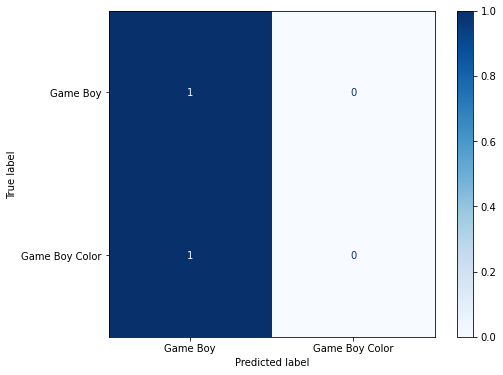

In [ ]:
#KNN Minmax
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_min,Y_train)
prediction=knn.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print("Accuracy is",accuracy*100,"%")

target_names=['Game Boy','Game Boy Color']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

Accuracy is 47.05882352941176 %
                precision    recall  f1-score   support

      Game Boy       0.53      0.80      0.64        10
Game Boy Color       0.00      0.00      0.00         7

      accuracy                           0.47        17
     macro avg       0.27      0.40      0.32        17
  weighted avg       0.31      0.47      0.38        17



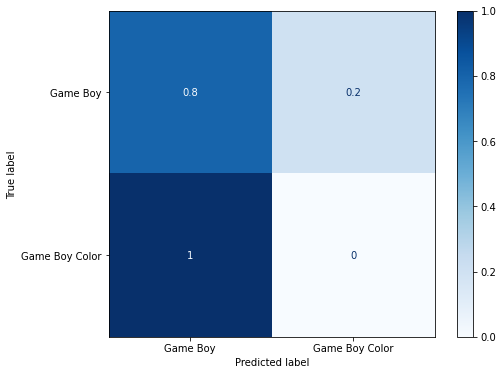

In [ ]:
#KNN StandardScaler
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_norm,Y_train)
prediction=knn.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print("Accuracy is",accuracy*100,"%")

target_names=['Game Boy','Game Boy Color']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

#Naive Bayes

Accuracy is 58.82352941176471 %
                precision    recall  f1-score   support

      Game Boy       0.59      1.00      0.74        10
Game Boy Color       0.00      0.00      0.00         7

      accuracy                           0.59        17
     macro avg       0.29      0.50      0.37        17
  weighted avg       0.35      0.59      0.44        17



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


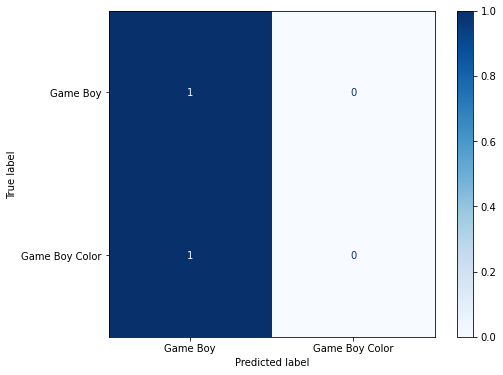

In [ ]:
#Naive Bayes Minmax
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_min,Y_train)
prediction=nb.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print("Accuracy is",accuracy*100,"%")

target_names=['Game Boy','Game Boy Color']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

Accuracy is 58.82352941176471 %
                precision    recall  f1-score   support

      Game Boy       0.59      1.00      0.74        10
Game Boy Color       0.00      0.00      0.00         7

      accuracy                           0.59        17
     macro avg       0.29      0.50      0.37        17
  weighted avg       0.35      0.59      0.44        17



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


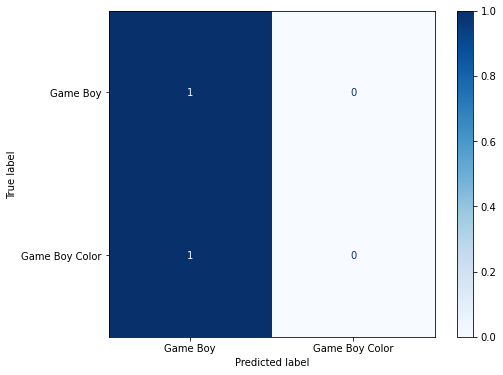

In [ ]:
#Naive Bayes StandardScaler
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_norm,Y_train)
prediction=nb.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print("Accuracy is",accuracy*100,"%")

target_names=['Game Boy','Game Boy Color']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

#Support Vector Machine

Accuracy is 58.82352941176471 %
                precision    recall  f1-score   support

      Game Boy       0.59      1.00      0.74        10
Game Boy Color       0.00      0.00      0.00         7

      accuracy                           0.59        17
     macro avg       0.29      0.50      0.37        17
  weighted avg       0.35      0.59      0.44        17



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


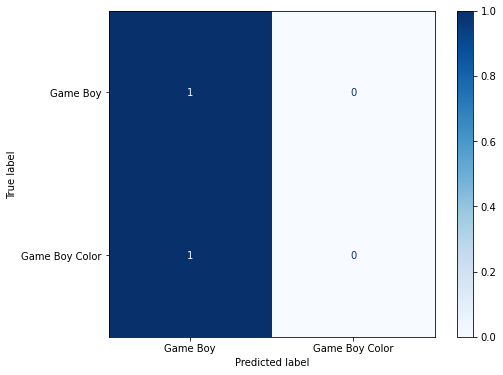

In [ ]:
#SVM Minmax
from sklearn.svm import SVC
ss=SVC()
ss.fit(X_train_min,Y_train.values.ravel())
prediction=ss.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print("Accuracy is",accuracy*100,"%")

target_names=['Game Boy','Game Boy Color']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

Accuracy is 58.82352941176471 %
                precision    recall  f1-score   support

      Game Boy       0.59      1.00      0.74        10
Game Boy Color       0.00      0.00      0.00         7

      accuracy                           0.59        17
     macro avg       0.29      0.50      0.37        17
  weighted avg       0.35      0.59      0.44        17



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


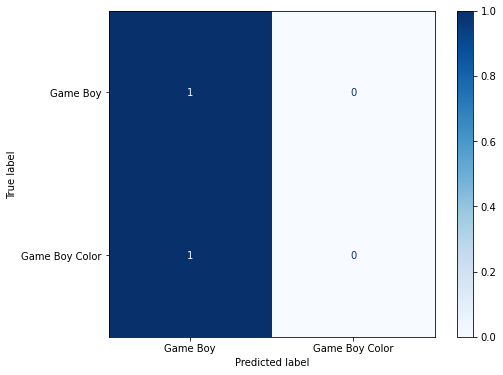

In [ ]:
#SVM StandardScaler
from sklearn.svm import SVC
ss=SVC()
ss.fit(X_train_norm,Y_train.values.ravel())
prediction=ss.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print("Accuracy is",accuracy*100,"%")

target_names=['Game Boy','Game Boy Color']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

#Decision Tree

Accuracy is 70.58823529411765 %
                precision    recall  f1-score   support

      Game Boy       0.73      0.80      0.76        10
Game Boy Color       0.67      0.57      0.62         7

      accuracy                           0.71        17
     macro avg       0.70      0.69      0.69        17
  weighted avg       0.70      0.71      0.70        17



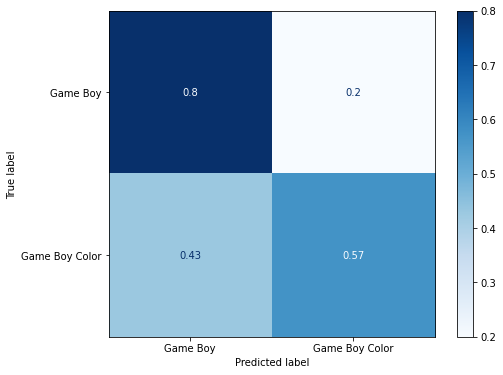

In [ ]:
#Decision Tree Minmax
from sklearn.tree import DecisionTreeClassifier
ss=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
ss.fit(X_train_min,Y_train)
prediction=ss.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print("Accuracy is",accuracy*100,"%")

target_names=['Game Boy','Game Boy Color']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

Accuracy is 70.58823529411765 %
                precision    recall  f1-score   support

      Game Boy       0.73      0.80      0.76        10
Game Boy Color       0.67      0.57      0.62         7

      accuracy                           0.71        17
     macro avg       0.70      0.69      0.69        17
  weighted avg       0.70      0.71      0.70        17



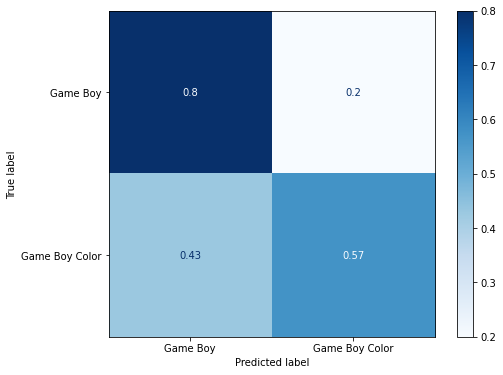

In [ ]:
#Decision Tree Standardscaler
from sklearn.tree import DecisionTreeClassifier
ss=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=0)
ss.fit(X_train_norm,Y_train)
prediction=ss.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print("Accuracy is",accuracy*100,"%")

target_names=['Game Boy','Game Boy Color']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

#Random Forest

Accuracy is 64.70588235294117 %
                precision    recall  f1-score   support

      Game Boy       0.64      0.90      0.75        10
Game Boy Color       0.67      0.29      0.40         7

      accuracy                           0.65        17
     macro avg       0.65      0.59      0.57        17
  weighted avg       0.65      0.65      0.61        17



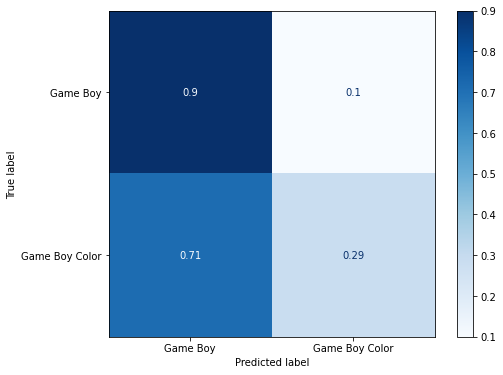

In [ ]:
#Random Forest Minmax
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train_min,Y_train)
prediction=rf.predict(X_test_min)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,prediction)
print("Accuracy is",accuracy*100,"%")

target_names=['Game Boy','Game Boy Color']
print(classification_report(Y_test,prediction.reshape(-1,1),target_names=target_names))
cm=confusion_matrix(Y_test,prediction.reshape(-1,1),normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig,ax=plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')
